## 1  Loading Packages

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
train = pd.read_csv("C://Users//Megha Deepika//Desktop//Bussiness Analytics//Practise//Loan prediction//train_u6lujuX_CVtuZ9i.csv")

In [269]:
test = pd.read_csv("C://Users//Megha Deepika//Desktop//Bussiness Analytics//Practise//Loan prediction//test_Y3wMUE5_7gLdaTN.csv")

In [157]:
train_original = train.copy()
test_original = test.copy()

## 2 Understanding the data

In [66]:
#checking the no of col in data set
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [268]:
test.columns #Here to predict loan status

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [58]:
train.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
LoanAmount_log             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Loan_Status_N                uint8
Loan_Status_Y                uint8
dtype: object

In [158]:
train.shape,test.shape

((614, 13), (367, 12))

In [8]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 3 Univariate analysis

### Target Variable

In [68]:
#calculating frequency table
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [69]:
#To pring proportions instead of number we use normalise function
train["Loan_Status"].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

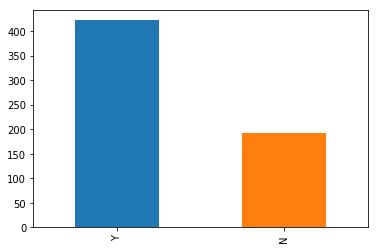

In [70]:
train["Loan_Status"].value_counts().plot.bar() #68.7 percent of ppl received loan

### Categorical variable

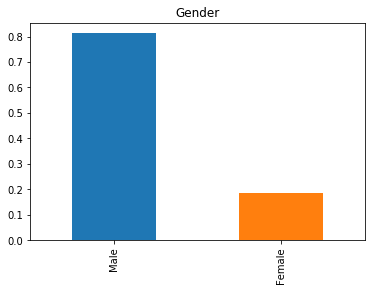

In [13]:
train["Gender"].value_counts(normalize = True).plot.bar(title = 'Gender') #80 prcent applicants in data set are male

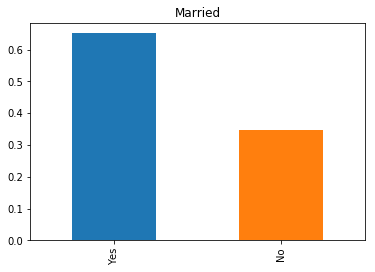

In [15]:
train["Married"].value_counts(normalize = True).plot.bar(title ="Married") #65 percent of applicants are married

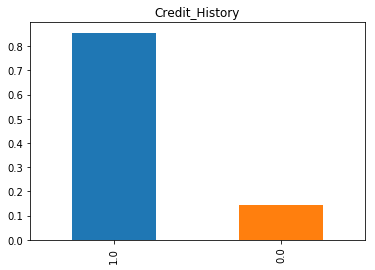

In [59]:
train["Credit_History"].value_counts(normalize = True).plot.bar(title ="Credit_History") #85% of applicants have repaid their debts

### Independent variable (ordinal) 

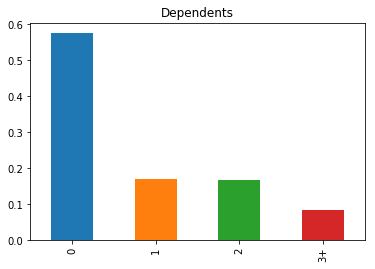

In [17]:
train["Dependents"].value_counts(normalize = True).plot.bar(title = "Dependents") #

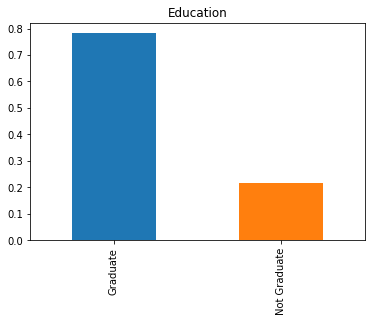

In [42]:
train["Education"].value_counts(normalize = True).plot.bar(title = "Education") #80 percent are graduates


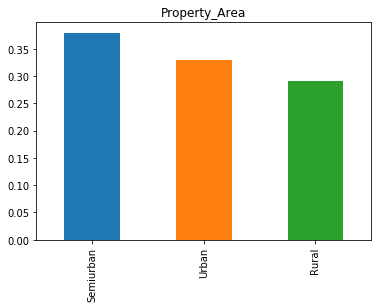

In [41]:
train["Property_Area"].value_counts(normalize = True).plot.bar(title = "Property_Area") # most of them are from semi urban area

## Independent variable(Numerical)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


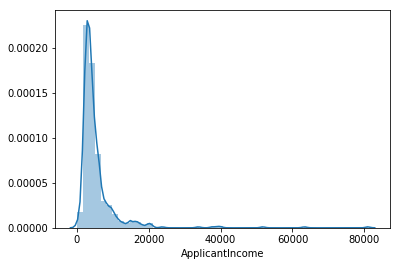

In [8]:
sns.distplot(train['ApplicantIncome']); #for numerical data we use sns plot

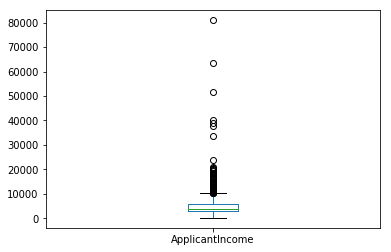

In [18]:
train['ApplicantIncome'].plot.box() 
plt.show() #There are lot of outliers

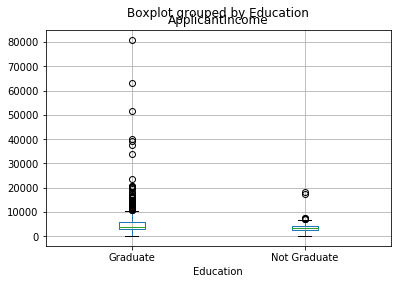

In [26]:

train.boxplot(column="ApplicantIncome", by = "Education") #people who are graduated have high income


C:\Users\Megha Deepika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Megha Deepika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


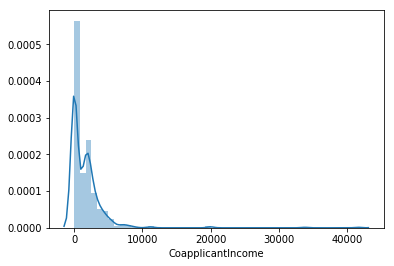

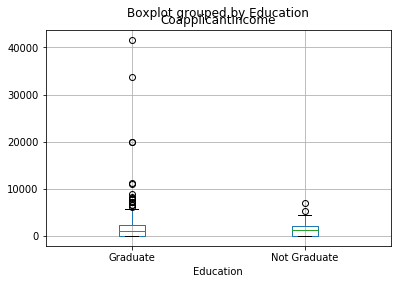

In [19]:
sns.distplot(train['CoapplicantIncome']);
train.boxplot(column="CoapplicantIncome", by = "Education")

C:\Users\Megha Deepika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Megha Deepika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


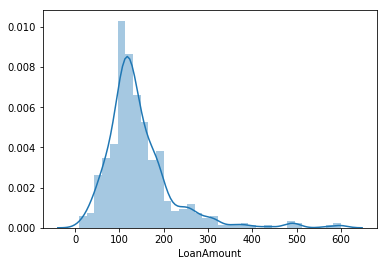

In [71]:
#There are missing values in loan amount so to drop them
df = train.dropna()
sns.distplot(df["LoanAmount"]);

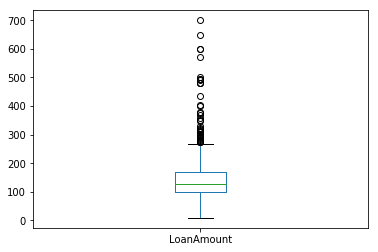

In [23]:
train["LoanAmount"].plot.box() #Outliers are present here

## Bivariate Analysis

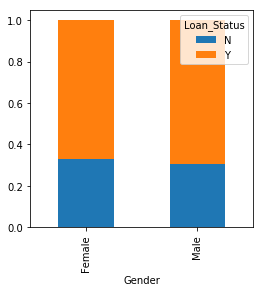

In [78]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [83]:
Gender.sum(0)

Loan_Status
N    187
Y    414
dtype: int64

In [27]:
Gender.sum(1)

Gender
Female    112
Male      489
dtype: int64

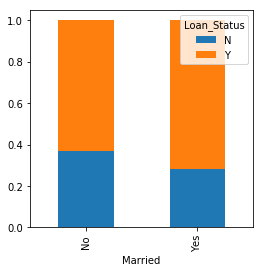

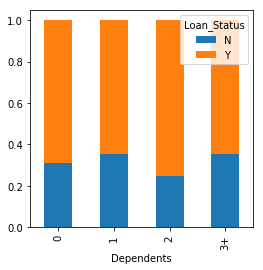

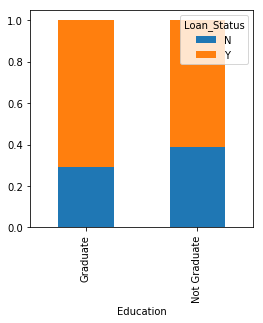

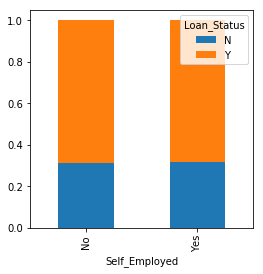

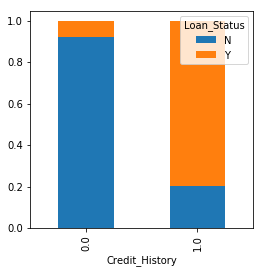

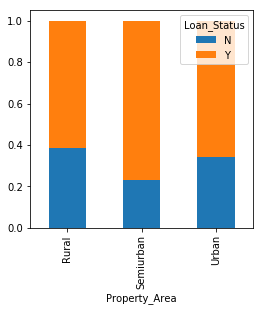

In [84]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


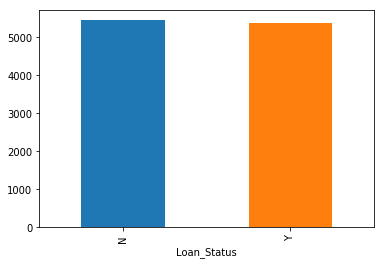

In [85]:
### Numerical variable verses target variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar() # It seems to be same so we use bins

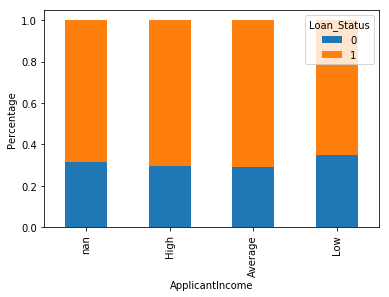

In [112]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

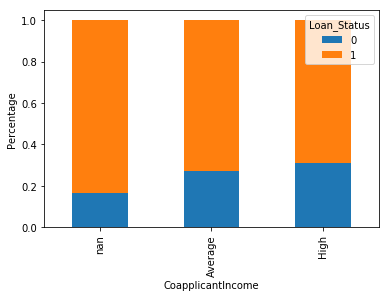

In [138]:
bins=[0,1000,3000,42000]
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [94]:
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

Text(0.5,1,'Heatmap of Correlation Matrix')

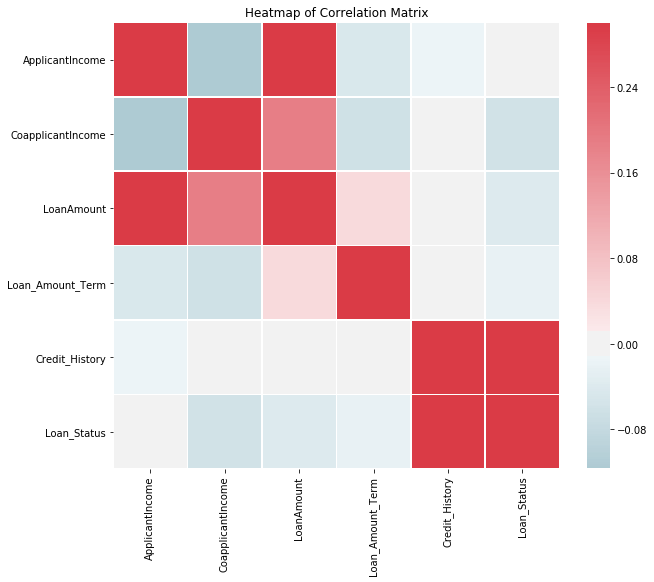

In [95]:
##To find correlation using heat map
import matplotlib.pyplot as plot
corr=train.corr()

plot.figure(figsize=(10,10))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap=cmap,
            vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plot.title('Heatmap of Correlation Matrix')

In [87]:
# From the above we can infer that correlation is quite high in "applicant income" and "loan amount", 
#"loan status" and "credit history" and "loan amount" and "coapplicant income"

## Imputing missing values and outliers

In [96]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [163]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [247]:
train['Gender'].fillna(train["Gender"].mode()[0],inplace = True)
train['Married'].fillna(train["Married"].mode()[0],inplace = True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace = True)
train['Self_Employed'].fillna(train["Self_Employed"].mode()[0],inplace = True)
train['Credit_History'].fillna(train["Credit_History"].mode()[0],inplace = True)

In [248]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [249]:
train['Loan_Amount_Term'].fillna(train["Loan_Amount_Term"].mode()[0],inplace = True)

In [177]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [178]:
#since there are outliers we go with median
train['LoanAmount'].fillna(train["LoanAmount"].median(),inplace = True) #why zero is included there

In [179]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


C:\Users\Megha Deepika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Megha Deepika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


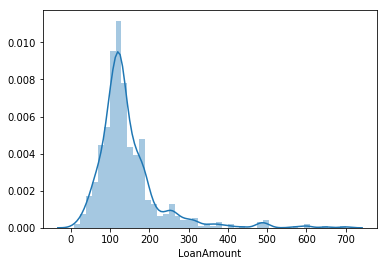

In [180]:
##Now missing values are removed
sns.distplot(train["LoanAmount"]); #More number of outliers are present and hence it is right skewed

## Outlier Treatment

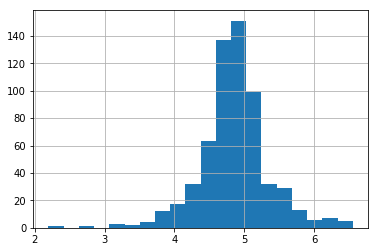

In [181]:
#To remove outliers
train["LoanAmount_log"] = np.log(train["LoanAmount"])
train["LoanAmount_log"].hist(bins = 20)


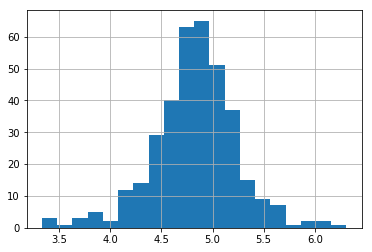

In [40]:
test["LoanAmount_log"] = np.log(test["LoanAmount"])
test["LoanAmount_log"].hist(bins = 20)

In [ ]:
## RMSE is highly affected by presence of outliers
## Different Evaluation metrics are used

## Model building


In [123]:
##Logistic Regression is a classification algorithm.It is used to predict a binary outcome
# (1 / 0, Yes / No, True / False) given a set of independent variables.

In [186]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1


In [184]:
#Converting Categorical to Numerical Variables
train=pd.get_dummies(train) 


In [188]:
train.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
5,5417,4196.0,267.0,360.0,1.0,5.587249,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
6,2333,1516.0,95.0,360.0,1.0,4.553877,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
7,3036,2504.0,158.0,360.0,0.0,5.062595,0,1,0,1,...,1,1,0,1,0,0,1,0,1,0
8,4006,1526.0,168.0,360.0,1.0,5.123964,0,1,0,1,...,0,1,0,1,0,0,0,1,0,1
9,12841,10968.0,349.0,360.0,1.0,5.855072,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0


In [242]:
train.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [238]:
train.shape

(614, 23)

In [280]:
#dividing the original data set into train and test part to validate it
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train ,y_cv = train_test_split(X,y, test_size =0.3)

In [281]:
# Importing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [282]:
model  = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [288]:
#after fitting we are predicting the remaining data
pred_cv = model.predict(x_cv)

In [284]:
accuracy_score(y_cv,pred_cv) 

0.7837837837837838

In [154]:
# we predicted x_cv and matched it with orginal cv
#obtained 82 percent of accuracy score

In [229]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [270]:
test=test.drop('Loan_ID',axis=1)

In [271]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [272]:
test['Gender'].fillna(test["Gender"].mode()[0],inplace = True)
test['Loan_Amount_Term'].fillna(test["Loan_Amount_Term"].mode()[0],inplace = True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace = True)
test['Self_Employed'].fillna(test["Self_Employed"].mode()[0],inplace = True)
test['Credit_History'].fillna(test["Credit_History"].mode()[0],inplace = True)


In [273]:
test['LoanAmount'].fillna(test["LoanAmount"].median(),inplace = True)

In [274]:
test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [275]:
test=pd.get_dummies(test)

In [276]:
train.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [286]:
train.shape, test.shape

((614, 13), (367, 20))

In [285]:
pred_test = model.predict(test)

ValueError: X has 20 features per sample; expecting 638